# Лабораторная работа №5

№ 1. В примере алгоритма поиска в ширину из лекции
(https://cloud.mail.ru/public/9yCy/LitbGAfEg) структура данных граф представлена
словарем. Переделайте этот пример, заменив словарь на реализацию класса Graph из
лекционных материалов.

In [27]:
class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self, nbr, weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self, nbr):
        return self.connectedTo[nbr]


class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self, key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self, n):
        return n in self.vertList

    def addEdge(self, f, t, cost=0):
        if f not in self.vertList:
            self.addVertex(f)
        if t not in self.vertList:
            self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())

In [28]:
from collections import deque

def person_is_seller(name):
    return name[0].lower() == 'a'

g = Graph()
g.addEdge("you", "alice")
g.addEdge("you", "bob")
g.addEdge("you", "claire")
g.addEdge("bob", "anuj")
g.addEdge("bob", "peggy")
g.addEdge("alice", "peggy")
g.addEdge("claire", "thom")
g.addEdge("claire", "jonny")
g.addEdge("anuj", "anuj")

def search(name, graph):
    start = graph.getVertex(name)
    if start is None:
        return False
    search_queue = deque()
    search_queue += start.getConnections()
    searched = set()
    while search_queue:
        person = search_queue.popleft()
        person_id = person.getId()
        if person_id not in searched:
            if person_is_seller(person_id):
                print(person_id + " is a mango seller!")
                return True
            else:
                search_queue += person.getConnections()
                searched.add(person_id)
    return False

# Запуск поиска
search("you", g)

alice is a mango seller!


True

№ 2. Реализуйте программу, которая по заданному в виде списка смежности графу строит
обращённый граф (тоже в виде списка смежности). Обращённый граф получается
изменением направления всех рёбер исходного графа. Используйте класс Graph из
лекционных материалов.

![CleanShot 2025-12-07 at 13.39.37.png](<attachment:CleanShot 2025-12-07 at 13.39.37.png>)
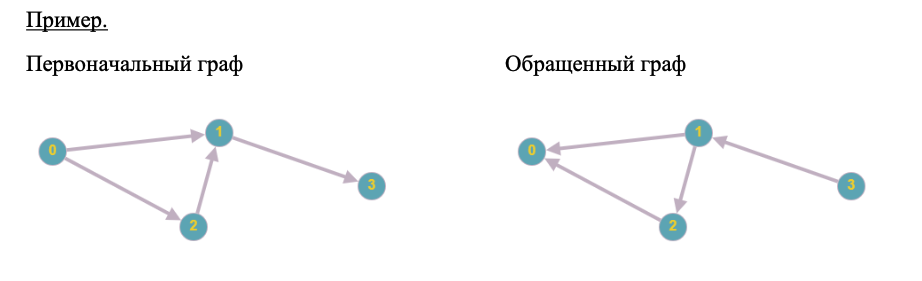

In [29]:
g1 = Graph()

g1.addEdge(0, 1)
g1.addEdge(0, 2)
g1.addEdge(1, 3)

def reverse_graph(graph):
    reversed_g = Graph()
    for vertex in graph:
        for neighbor in vertex.getConnections():
            reversed_g.addEdge(neighbor.getId(), vertex.getId())
    return reversed_g
    
reversed_g1 = reverse_graph(g1)
for vertex in reversed_g1:
    print(f"Vertex {vertex.getId()} has edges to {[nbr.getId() for nbr in vertex.getConnections()]}")


Vertex 1 has edges to [0]
Vertex 0 has edges to []
Vertex 2 has edges to [0]
Vertex 3 has edges to [1]


№ 3. Реализуйте программу, которая по заданному в виде списка смежности графу строит
обращённый граф (тоже в виде списка смежности). Обращённый граф получается
изменением направления всех рёбер исходного графа. Используйте класс Graph из
лекционных материалов.

![CleanShot 2025-12-07 at 13.38.04.png](<attachment:CleanShot 2025-12-07 at 13.38.04.png>)

Напишите программу, которая при помощи поиска в глубину (Depth-first search, DFS)
проведет топологическую сортировку представленного графа и выдаст вариант корректной
последовательности шагов. Например:

![CleanShot 2025-12-07 at 13.39.22.png](<attachment:CleanShot 2025-12-07 at 13.39.22.png>)
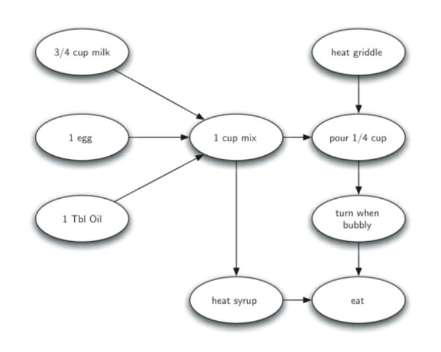
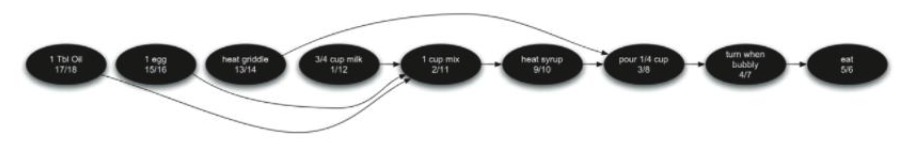

In [30]:
g2 = Graph()

g2.addEdge("3/4 cup milk", "1 cup mix")
g2.addEdge("1 egg", "1 cup mix")
g2.addEdge("1 spoon oil", "1 cup mix")
g2.addEdge("heat griddle", "pour 1/4 cup")
g2.addEdge("1 cup mix", "pour 1/4 cup")
g2.addEdge("1 cup mix", "heat syrup")
g2.addEdge("heat syrup", "eat")
g2.addEdge("pour 1/4 cup", "turn when bubbly")
g2.addEdge("turn when bubbly", "eat")

def dfs_sort(graph):
    visited = set()
    result = []

    def dfs(vertex):
        visited.add(vertex.getId())
        for neighbor in vertex.getConnections():
            if neighbor.getId() not in visited:
                dfs(neighbor)
        result.append(vertex.getId())

    for vertex in graph:
        if vertex.getId() not in visited:
            dfs(vertex)

    result.reverse()
    return result

topological_order = dfs_sort(g2)
print("Topological Sort Order:", topological_order)

Topological Sort Order: ['heat griddle', '1 spoon oil', '1 egg', '3/4 cup milk', '1 cup mix', 'heat syrup', 'pour 1/4 cup', 'turn when bubbly', 'eat']


№4. У вас имеется список городов и набор автобусных маршрутов между ними. Маршруты
однонаправленные, т.е. маршрут вида «город А – город Б» означает, что можно поехать из
города А в город Б, а обратного проезда нет.
Пользователь вводит два города. Ваша программа должна определить минимальный по
количеству километров возможный путь от первого до второго города, или сообщение, что
пути между городами нет. Нужно вывести как количество километров, так и получившейся
путь.

Для решения задачи используйте алгоритм Дейкстры и класс Graph из лекционных
материалов. Список городов и маршрутов возьмите согласно вашему варианту. Расстояние
между городами найдите в интернете самостоятельно.
Также необходимо нарисовать граф вашего варианта (например, здесь
https://graphonline.ru/) и приложить его в ваш отчет.

![CleanShot 2025-12-07 at 14.17.04@2x.png](<attachment:CleanShot 2025-12-07 at 14.17.04@2x.png>)

Вариант 4.
Города:
Мариинск, Яя, Яшкино, Юрга, Анжеро-Судженск, Кемерово, Томск.

Маршруты:
Мариинск – Яя
Мариинск – Яшкино
Мариинск – Юрга
Мариинск – Анжеро-Судженск
Яя – Кемерово
Яшкино – Яя
Яшкино – Томск
Юрга – Яшкино
Юрга – Томск
Юрга – Анжеро-Судженск
Томск – Кемерово
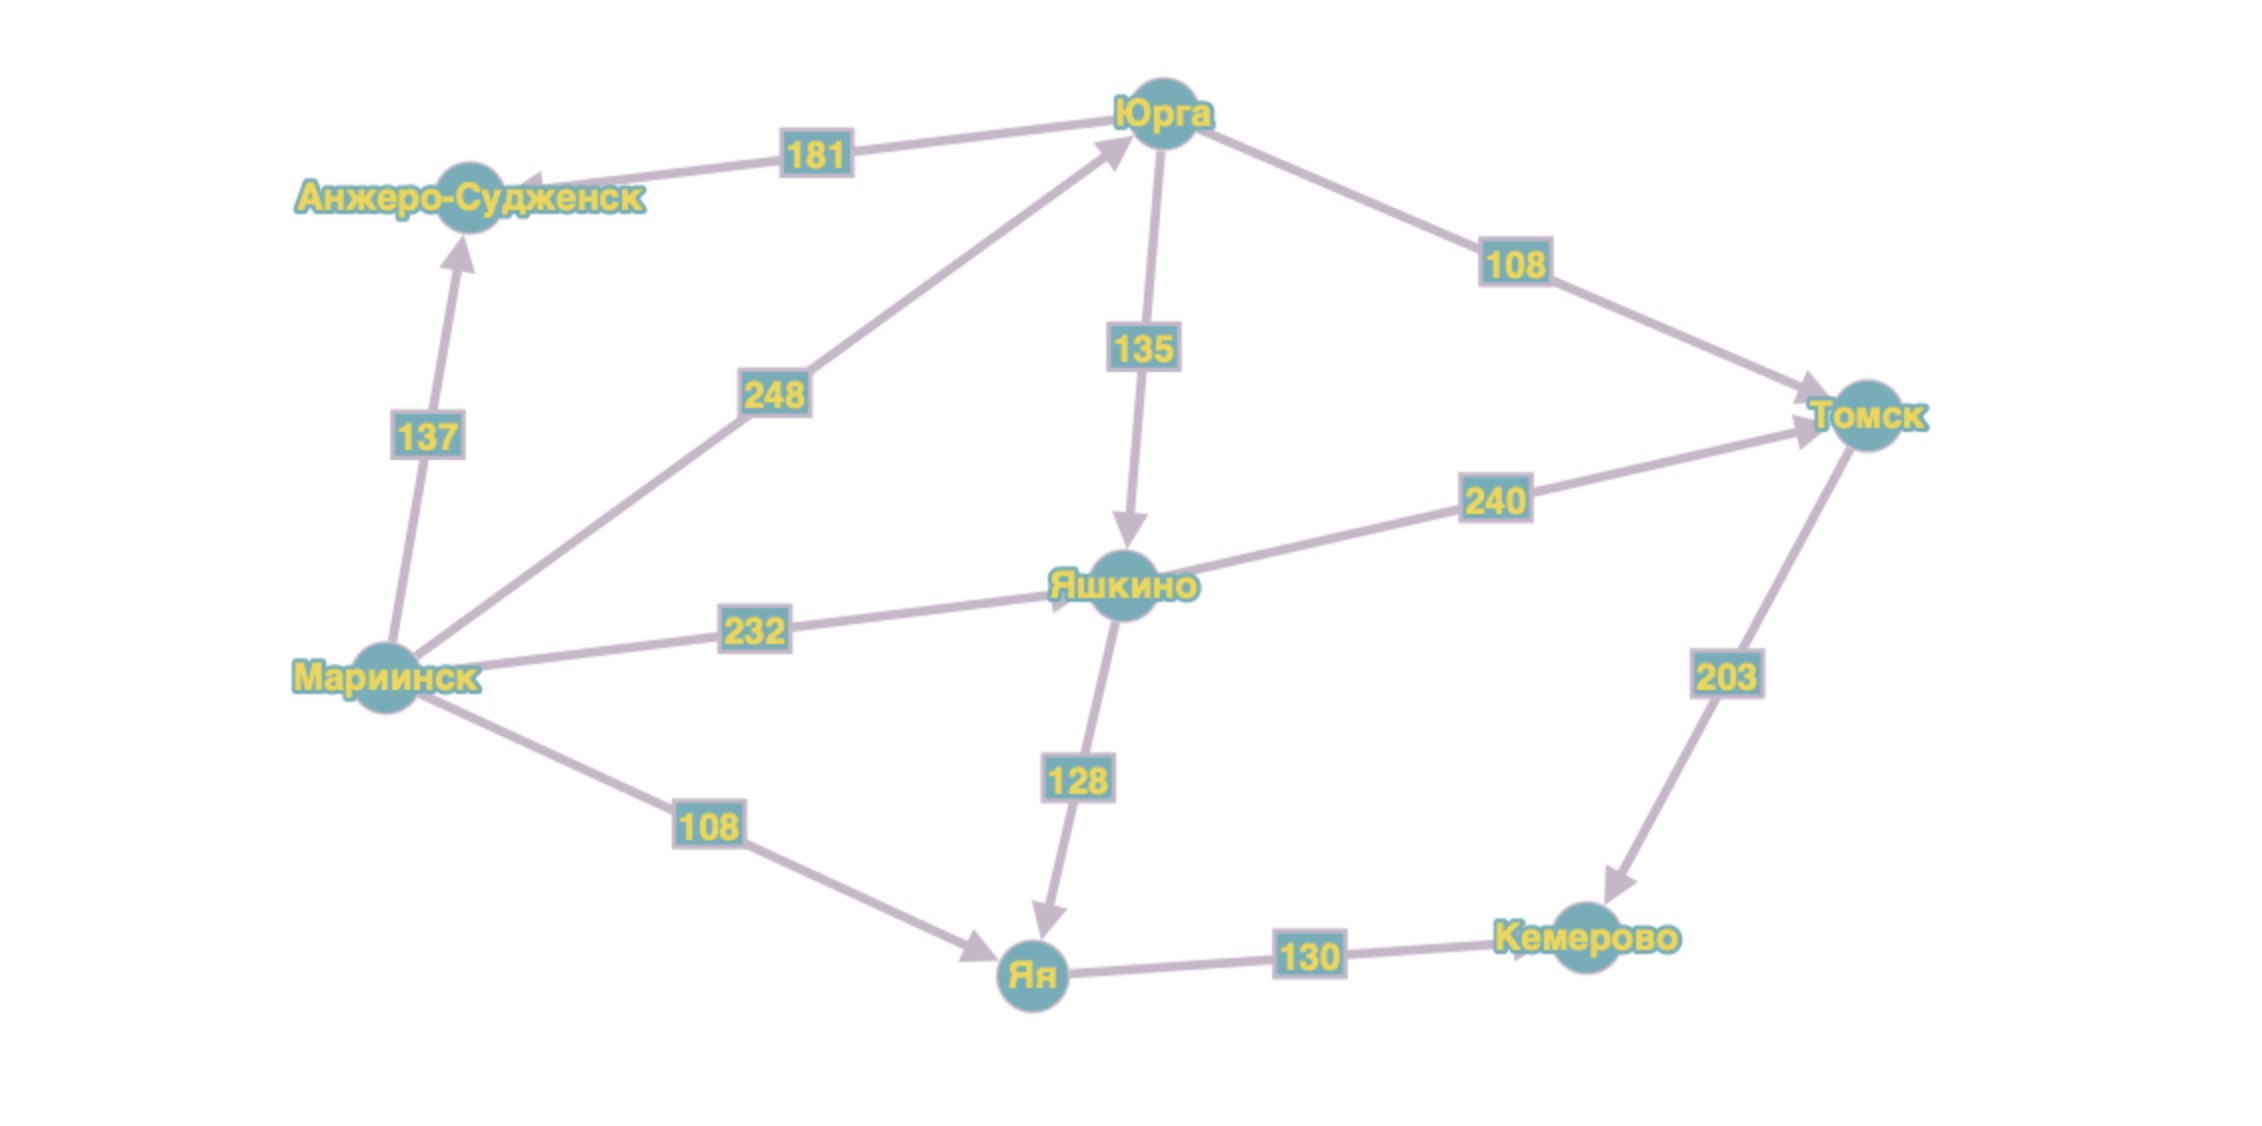

In [35]:
import heapq

g3 = Graph()

g3.addEdge("Мариинск", "Яя", 108)
g3.addEdge("Мариинск", "Яшкино", 232)
g3.addEdge("Мариинск", "Юрга", 248)
g3.addEdge("Мариинск", "Анжеро-Судженск", 137)
g3.addEdge("Яя", "Кемерово", 130)
g3.addEdge("Яшкино", "Яя", 128)
g3.addEdge("Яшкино", "Томск", 240)
g3.addEdge("Юрга", "Яшкино", 135)
g3.addEdge("Юрга", "Томск", 108)
g3.addEdge("Юрга", "Анжеро-Судженск", 181)
g3.addEdge("Томск", "Кемерово", 203)

def dijkstra(graph, start, end):
    start_vertex = graph.getVertex(start)
    end_vertex = graph.getVertex(end)

    if start_vertex is None or end_vertex is None:
        print("Один из указанных городов не найден в графе.")
        return None

    # Инициализация расстояний и предков
    distances = {}
    previous = {}
    for v in graph:
        distances[v] = float('inf')
        previous[v] = None

    distances[start_vertex] = 0

    # Куча хранит кортежи (distance, vertex_id, vertex)
    heap = []
    heapq.heappush(heap, (0, start_vertex.getId(), start_vertex))

    while heap:
        current_dist, _, u = heapq.heappop(heap)

        # Если извлечённое расстояние больше текущего в таблице, пропускаем дубликат
        if current_dist > distances[u]:
            continue

        # Если дошли до конечной вершины — можно прервать (пусть остается, это оптимально)
        if u is end_vertex:
            break

        for neighbor in u.getConnections():
            weight = u.getWeight(neighbor)
            alt = current_dist + weight
            if alt < distances[neighbor]:
                distances[neighbor] = alt
                previous[neighbor] = u
                heapq.heappush(heap, (alt, neighbor.getId(), neighbor))

    if distances[end_vertex] == float('inf'):
        print(f"Пути от {start} до {end} нет.")
        return None

    # Восстановление пути
    path_vertices = []
    v = end_vertex
    while v is not None:
        path_vertices.append(v.getId())
        v = previous[v]
    path_vertices.reverse()

    print(f"Кратчайший путь от {start} до {end}: {' -> '.join(path_vertices)}")
    print(f"Длина пути: {distances[end_vertex]} км")
    return distances[end_vertex], path_vertices

# Пример запуска
dijkstra(g3, "Мариинск", "Кемерово")
dijkstra(g3, "Мариинск", "Томск")
    



Кратчайший путь от Мариинск до Кемерово: Мариинск -> Яя -> Кемерово
Длина пути: 238 км
Кратчайший путь от Мариинск до Томск: Мариинск -> Юрга -> Томск
Длина пути: 356 км


(356, ['Мариинск', 'Юрга', 'Томск'])